In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
import random

In [ ]:
def get_Haar(l,d):
  X = np.random.randn(d,l)
  Q,R = np.linalg.qr(X , mode = 'reduced')
  L = np.diag(np.sign(np.diag(R)))
  P = ((d/l)**0.5)*np.matmul(Q,L)
  return P

In [ ]:
# l,d = 10,100
# K = 50
# Haar = []
# for i in range(K):
#   P=get_Haar(l,d)
#   Haar.append([P.dot(P.T)])

In [ ]:
def subopt(K,T,l,d):
  Haar = []
  for i in range(K):
    P = get_Haar(l,d)
    Haar.append([P.dot(P.T)])
  S = np.zeros_like(Haar[0])
  for j in range(T):
    S = S + random.choice(Haar)
  Exp = S/T
  err = np.linalg.norm((Exp.reshape(d,d) - np.identity(d)),'fro')
  return err

In [ ]:
subopt()

In [ ]:
def geterr(d,l,T):
  err = np.array([])
  K = np.array([])
  for k in range(1,T+1):
    err = np.append(err, subopt(k,T,l,d))
    K = np.append(K,k)
  return K,err

In [ ]:
k1,err1 = geterr(d = 100, l =2, T=1000)
k2,err2 = geterr(d = 100, l=10, T=1000)
k3,err3 = geterr(d = 100, l=25, T=1000)
k4,err4 = geterr(d = 100, l=50, T= 1000)
k5,err5 = geterr(d = 100, l =75, T = 1000)


In [ ]:
k6,err6 = geterr(d = 100, l =90, T = 1000)

In [ ]:
np.savetxt("k1.csv", k1,
              delimiter = ",")
np.savetxt("k2.csv", k2,
              delimiter = ",")
np.savetxt("k3.csv", k3,
              delimiter = ",")
np.savetxt("k4.csv", k4,
              delimiter = ",")
np.savetxt("k5.csv", k5,
              delimiter = ",")
np.savetxt("err1.csv", err1,
              delimiter = ",")
np.savetxt("err2.csv", err2,
              delimiter = ",")
np.savetxt("err3.csv", err3,
              delimiter = ",")
np.savetxt("err4.csv", err4,
              delimiter = ",")
np.savetxt("err5.csv", err5,
              delimiter = ",")


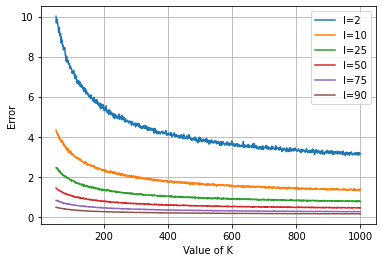

In [ ]:
plt.plot(k1[50:] , err1[50:] , linestyle = '-', label ='l=2')
plt.plot(k2[50:] , err2[50:] , linestyle = '-', label ='l=10')
plt.plot(k3[50:] , err3[50:] , linestyle = '-', label ='l=25')
plt.plot(k4[50:] , err4[50:] , linestyle = '-', label ='l=50')
plt.plot(k5[50:] , err5[50:] , linestyle = '-', label ='l=75')
plt.plot(k6[50:] , err6[50:] , linestyle = '-', label ='l=90')
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.legend()

In [ ]:
err3[100]

1.8249817349905537

In [ ]:
# k11,err11 = geterr(d = 500, l =25, T=1000)
# k21,err21 = geterr(d = 500, l=75, T=1000)
# k31,err31 = geterr(d = 500, l=125, T=1000)
# k41,err41 = geterr(d = 500, l=250, T= 1000)
# k51,err51 = geterr(d = 500, l =375, T = 1000)

In [ ]:
# plt.plot(k11[50:] , err11[50:] , linestyle = '-', label ='l=2')
# plt.plot(k21[50:] , err21[50:] , linestyle = '-', label ='l=10')
# plt.plot(k31[50:] , err31[50:] , linestyle = '-', label ='l=25')
# plt.plot(k41[50:] , err41[50:] , linestyle = '-', label ='l=50')
# plt.plot(k51[50:] , err51[50:] , linestyle = '-', label ='l=75')
# plt.xlabel('Value of K')
# plt.ylabel('Error')
# plt.grid()
# plt.legend()

In [ ]:
F=0
for i in range(1000):
  F = F + np.linalg.norm(get_Haar(10,20), 'fro')
  P = get_Haar(1,100)
print(F/1000)
np.linalg.norm(P.dot(P.T) , 'fro')

4.472135954999514


99.99999999999999

In [ ]:
def get_z():
  return np.random.uniform(0,1)
  # return 0.5

In [ ]:
def grad_func(x,z,A,B):   #least squares minimization z*|| AX-B ||^2
  # return 2*z*np.matmul(A.T,(np.matmul(A,x)-B))
  return 2*z*(x)

In [ ]:
G = np.random.random((100,100))
A = (G + G.T)/2
B = np.random.random((100,1))
x_s = np.ones((100,1))*10
x_op = np.matmul(np.matmul(np.linalg.inv(np.matmul(A, A)),A.T),B)
np.min(x_op)

-1.7255762605891203

In [ ]:
x_s = np.ones((100,1))*10

In [ ]:
def Frank_wolfe(T, eta, epsilon, rho, x_start, x_opt, A, B, l , d):
  x_curr = np.copy(x_start)
  x_prev = np.copy(x_curr)
  s_time = time.time()
  err_arr = np.array([])
  iter_arr = np.array([])
  time_arr = np.array([])
  err = abs(np.linalg.norm(x_curr-1))
  c_t = time.time()-s_time
  err_arr = np.append(err_arr, err)
  time_arr = np.append(time_arr, c_t)
  # iter_arr = np.append(iter_arr,1)
  z_prev = 0
  for i in range(T):
    if i == 0:
      eta = 1.
      z = get_z()
      d_curr = grad_func(x_curr,z,A,B)
      # print(d_curr.shape)
      d_prev = d_curr
      # print("x_curr_1", x_curr.shape)
      d_curr = d_curr.reshape(d,1)
      fun = lambda x: np.matmul(d_curr,x)
      x0 = np.ones((d, 1))
      con = LinearConstraint(np.identity(d),-10,10)
      res = minimize(fun,x0,constraints = con)
      y_curr = res.x

      x_next = (1-eta)*x_curr + eta*y_curr
      # df = x_next - x_curr
      # print("x_next", x_next.shape)
      x_curr = np.copy(x_next)
      err = abs(np.linalg.norm(x_curr-1))
      c_t = time.time()-s_time
      err_arr = np.append(err_arr, err)
      time_arr = np.append(time_arr, c_t)
      iter_arr = np.append(iter_arr,i+1)
      z_prev = z
      y_prev = y_curr
    else:
      eta = 1/((i+1))
      rho = 1/i
      z = get_z()
      # P = get_Haar(l,d)
      delta_curr = grad_func(x_curr,z,A,B) - grad_func(x_prev,z,A,B)
      x_prev = np.copy(x_curr)
      # print("x_curr", x_curr.shape)
      d_curr = (1-rho)*(d_prev + delta_curr) + rho*grad_func(x_curr,z,A,B)
      # - np.matmul((np.matmul(P,P.T)-np.identity(100)), d_prev)
      # print("d_curr", d_curr.shape)
      d_curr = d_curr.reshape(d,1)
      d_prev = d_curr

      fun = lambda x: np.matmul(d_curr,x)
      x0 = np.ones((d, 1))
      con = LinearConstraint(np.identity(d),-10,10)
      res = minimize(fun,x0,constraints = con)
      y_curr = res.x

      x_next = (1-eta)*x_curr + eta*y_curr
      y_prev = y_curr
      # df = x_next - x_curr
      x_curr = np.copy(x_next)
      err = abs(np.linalg.norm(x_curr))
      c_t = time.time()-s_time
      err_arr = np.append(err_arr, err)
      time_arr = np.append(time_arr, c_t)
      iter_arr = np.append(iter_arr,i+1)
      print("Iteration",i,"\n diff is",err)
      z_prev = z

  return iter_arr, err_arr, time_arr, x_next

In [ ]:
def argmin(v,P,l,d):
  v = v.flatten()
  print(v.shape)
  # x = P.T.dot(np.ones(10)*0)
  high = P.T.dot(np.ones((d,1))*(10))
  low = P.T.dot(np.ones((d,1))*(-10))
  high = high.flatten()
  low = low.flatten()

  # shape = args
  # v = v.reshape(shape)
  fun = lambda x: np.matmul(v,x)
  x0 = np.ones((l, 1))
  con = LinearConstraint(np.identity(l),low,high)
  res = minimize(fun,x0,constraints = con)
  return res.x

In [ ]:
def AlgoA(T, eta, epsilon, rho, x_start, x_opt, A, B, l , d):
  # x_opt = np.ones(d)*5
  x_curr = np.copy(x_start)
  x_prev = np.copy(x_curr)
  s_time = time.time()
  err_arr = np.array([])
  iter_arr = np.array([])
  time_arr = np.array([])
  err = abs(np.linalg.norm(x_curr-1))
  c_t = time.time()-s_time
  err_arr = np.append(err_arr, err)
  time_arr = np.append(time_arr, c_t)
  # iter_arr = np.append(iter_arr,1)
  z_prev = 0
  for i in range(T):
    if i == 0:
      eta = 1.
      P = get_Haar(l,d)
      z = get_z()
      d_curr = grad_func(x_curr,z,A,B)
      # print(d_curr.shape)
      d_prev = d_curr
      u_curr = argmin(np.matmul(P.T, d_curr),P ,l,d)
      y_curr = P.dot(u_curr).reshape(d, 1)
      # print("x_curr_1", x_curr.shape)

      x_next = (1-eta)*x_curr + eta*y_curr
      # df = x_next - x_curr
      # print("x_next", x_next.shape)
      x_curr = np.copy(x_next)
      err = abs(np.linalg.norm(x_curr-1))
      c_t = time.time()-s_time
      err_arr = np.append(err_arr, err)
      time_arr = np.append(time_arr, c_t)
      iter_arr = np.append(iter_arr,i+1)
      z_prev = z
      y_prev = y_curr
    else:
      k = (d/l+1)
      eta = 1/((i+1))
      rho = 1/i
      z = get_z()
      P = get_Haar(l,d)
      delta_curr = grad_func(x_curr,z,A,B) - grad_func(x_prev,z,A,B)
      x_prev = np.copy(x_curr)
      # print("x_curr", x_curr.shape)
      d_curr = (1-rho)*(d_prev + delta_curr) + rho*grad_func(x_curr,z,A,B)
      # - np.matmul((np.matmul(P,P.T)-np.identity(100)), d_prev)
      # print("d_curr", d_curr.shape)
      d_prev = d_curr
      u_curr = argmin(np.matmul(P.T, d_curr),P,l,d)
      y_curr = P.dot(u_curr).reshape(d, 1)
      x_next = (1-eta)*x_curr + eta*y_curr
      y_prev = y_curr
      # df = x_next - x_curr
      x_curr = np.copy(x_next)
      err = abs(np.linalg.norm(x_curr))
      c_t = time.time()-s_time
      err_arr = np.append(err_arr, err)
      time_arr = np.append(time_arr, c_t)
      iter_arr = np.append(iter_arr,i+1)
      print("Iteration",i,"\n diff is",err)
      z_prev = z
      # if err < 0.5:
      #   break;
  return iter_arr, err_arr, time_arr, x_next

In [ ]:
def Grad_Descent(T,eta,epsilon,x_opt,x_start,a,b):
  # x_opt = np.ones(100)*5
  s_time = time.time()
  x_curr = x_start
  iter = 0
  diff_v = np.array([])
  time_v = np.array([])
  iteration = np.array([])
  diff = np.linalg.norm((x_curr),2)
  c_t = time.time()-s_time
  diff_v = np.append(diff_v,diff)
  time_v = np.append(time_v, c_t)
  iteration = np.append(iteration,1)
  eigen = np.linalg.eigvals(2*np.matmul(a,a.T))
  l_max, l_min = np.amax(eigen), np.amin(eigen)
  x_next = x_curr
  for i in range(T):
    x_curr = x_next
    x_next = x_curr - (1/(i+1))*grad_func(x_curr,0.5,a,b)
    # x_next = x_curr - (2/(l_max+l_min))*grad_func(x_curr,0.5,a,b)
    # /np.linalg.norm(grad(x_curr,a,b),2)
    iter = iter + 1
    diff = np.linalg.norm((x_curr),2)
    c_t = time.time() - s_time
    diff_v = np.append(diff_v,diff)
    time_v = np.append(time_v, c_t)
    iteration = np.append(iteration,iter)
    print("Iteration",iter,"\n diff is",diff)
  return time_v, iteration, diff_v, x_next

In [ ]:
def AlgoAi(T, eta, epsilon, rho, x_start, x_opt, A, B, l , d):
  # x_opt = np.ones(d)*5
  x_curr = np.copy(x_start)
  x_prev = np.copy(x_curr)
  s_time = time.time()
  err_arr = np.array([])
  iter_arr = np.array([])
  time_arr = np.array([])
  err = abs(np.linalg.norm(x_curr))
  c_t = time.time()-s_time
  err_arr = np.append(err_arr, err)
  time_arr = np.append(time_arr, c_t)
  # iter_arr = np.append(iter_arr,1)
  z_prev = 0
  for i in range(T):
    if i == 0:
      eta = 0.01
      P = get_Haar(l,d)
      z = get_z()
      d_curr = grad_func(x_curr,z,A,B)
      # print(d_curr.shape)
      d_prev = d_curr
      u_curr = argmin(np.matmul(P.T, d_curr),P ,l,d)
      y_curr = P.dot(u_curr).reshape(d, 1)
      # print("x_curr_1", x_curr.shape)

      x_next = (1-eta)*x_curr + eta*y_curr
      # df = x_next - x_curr
      # print("x_next", x_next.shape)
      x_curr = np.copy(x_next)
      err = abs(np.linalg.norm(x_curr))
      c_t = time.time()-s_time
      err_arr = np.append(err_arr, err)
      time_arr = np.append(time_arr, c_t)
      iter_arr = np.append(iter_arr,i+1)
      z_prev = z
      y_prev = y_curr
    else:
      k = ((d/l)**2+1)**0.5
      eta = 1/((i+1)*k)
      rho = 0.1
      z = get_z()
      P = get_Haar(l,d)
      delta_curr = grad_func(x_curr,z,A,B) - grad_func(x_prev,z,A,B)
      x_prev = np.copy(x_curr)
      # print("x_curr", x_curr.shape)
      d_curr = (1-rho)*(d_prev + delta_curr) + rho*grad_func(x_curr,z,A,B)
      # - np.matmul((np.matmul(P,P.T)-np.identity(100)), d_prev)
      # print("d_curr", d_curr.shape)
      d_prev = d_curr
      u_curr = argmin(np.matmul(P.T, d_curr),P,l,d)
      y_curr = P.dot(u_curr).reshape(d, 1)
      x_next = (1-eta)*x_curr + eta*y_curr
      y_prev = y_curr
      # df = x_next - x_curr
      x_curr = np.copy(x_next)
      err = abs(np.linalg.norm(x_curr))
      c_t = time.time()-s_time
      err_arr = np.append(err_arr, err)
      time_arr = np.append(time_arr, c_t)
      iter_arr = np.append(iter_arr,i+1)
      print("Iteration",i,"\n diff is",err)
      z_prev = z
      # if err < 0.5:
      #   break;
  return iter_arr, err_arr, time_arr, x_next

In [ ]:
# def AlgoB(T, eta, epsilon, rho, x_opt, A, B):
#   x_curr = np.copy(x_start)
#   x_prev = np.copy(x_curr)
#   s_time = time.time()
#   err_arr = np.array([])
#   iter_arr = np.array([])
#   time_arr = np.array([])
#   err = np.linalg.norm((x_curr - x_opt),2)
#   c_t = time.time()-s_time
#   err_arr = np.append(err_arr, err)
#   time_arr = np.append(time_arr, c_t)
#   # iter_arr = np.append(iter_arr,1)
#   for i in range(T):
#     if i == 0:
#       P = get_Haar(5,10)
#       z = get_z()
#       d_curr = grad_func(x_curr,z,A,B)
#       print(d_curr.shape)
#       d_prev = d_curr
#       u_curr = argmin(np.matmul(P.T, d_curr),P)
#       y_curr = P.dot(u_curr).reshape(10, 1)
#       print("x_curr_1", x_curr.shape)

#       x_next = (1-eta)*x_curr + eta*y_curr
#       print("x_next", x_next.shape)
#       x_curr = np.copy(x_next)
#       err = np.linalg.norm((x_curr - x_opt),2)
#       c_t = time.time()-s_time
#       err_arr = np.append(err_arr, err)
#       time_arr = np.append(time_arr, c_t)
#       iter_arr = np.append(iter_arr,i+1)
#     else:
#       z = get_z()
#       P = get_Haar(5,10)
#       delta_curr = grad_func(x_curr,z,A,B) - grad_func(x_prev,z,A,B)
#       x_prev = np.copy(x_curr)
#       print("x_curr", x_curr.shape)
#       d_curr = (1-rho)*(d_prev + delta_curr) + rho*grad_func(x_curr,z,A,B)
#       print("d_curr", d_curr.shape)
#       d_prev = d_curr
#       u_curr = argmin(np.matmul(P.T, d_curr),P)
#       y_curr = P.dot(u_curr).reshape(10, 1)
#       x_next = (1-eta)*x_curr + eta*y_curr
#       x_curr = np.copy(x_next)
#       err = np.linalg.norm((x_curr - x_opt),2)
#       c_t = time.time()-s_time
#       err_arr = np.append(err_arr, err)
#       time_arr = np.append(time_arr, c_t)
#       iter_arr = np.append(iter_arr,i+1)
#       print("Iteration",i,"\n diff is",err)
#   return iteration, err_list, time_list

In [ ]:
GT, GI, GE, xGD = Grad_Descent(1000,0.5 , 0.001, x_opt = np.copy(x_op), x_start = np.copy(x_s) , a = np.copy(A), b = np.copy(B) )

In [ ]:
ii_A1, ei_A1, ti_A1, x1i = Frank_wolfe(1000, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 2, d = 100)

In [ ]:
ii_A1, ei_A1, ti_A1, x1i = AlgoA(1000, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 2, d = 100)
ii_A2, ei_A2, ti_A2, x2i = AlgoA(1000, 1 , 0.1, 0.9, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 15 , d = 100)
ii_A3, ei_A3, ti_A3, x3i = AlgoA(1000, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 25, d = 100)
ii_A4, ei_A4, ti_A4, x4i = AlgoA(100, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 75, d = 100) #z_prev

In [ ]:
# i_A1, e_A1, t_A1, x1 = AlgoAi(1000, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 10, d = 100)
# i_A2, e_A2, t_A2, x2 = AlgoA(1000, 1 , 0.1, 0.9, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 15 , d = 100)
# i_A3, e_A3, t_A3, x3 = AlgoAi(1000, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 25, d = 100)
i_A4, e_A4, t_A4, x4 = AlgoA(5000, 1 , 0.1, 0.6, x_start= np.copy(x_s), x_opt= np.copy(x_op), A = np.copy(A), B = np.copy(B), l = 10, d = 100) #z_prev

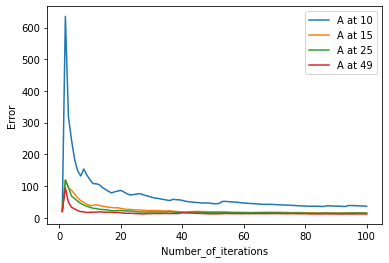

In [ ]:
plt.plot(ii_A1[:100] , ei_A1[:100] , linestyle = '-', label = 'A at 10')
plt.plot(ii_A2[:100] , ei_A2[:100] , linestyle = '-', label = 'A at 15')
plt.plot(ii_A3[:100] , ei_A3[:100] , linestyle = '-', label = 'A at 25')
plt.plot(ii_A4[:100] , ei_A4[:100] , linestyle = '-', label = 'A at 49')
# plt.plot(GI[:5] , GE[:5] , linestyle = '-', label ='GD')
plt.xlabel('Number_of_iterations')
plt.ylabel('Error')
plt.legend()

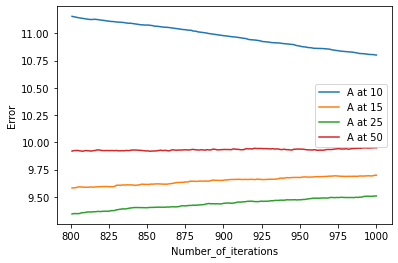

In [ ]:
plt.plot(i_A1[800:1000] , e_A1[800:1000] , linestyle = '-', label = 'A at 10') #dusra wala function hai
plt.plot(i_A2[800:1000] , e_A2[800:1000] , linestyle = '-', label = 'A at 15')
plt.plot(i_A3[800:1000] , e_A3[800:1000] , linestyle = '-', label = 'A at 25')
plt.plot(i_A4[800:1000] , e_A4[800:1000] , linestyle = '-', label = 'A at 50')
# plt.plot(GI[:5] , GE[:5] , linestyle = '-', label ='GD')
plt.xlabel('Number_of_iterations')
plt.ylabel('Error')
plt.legend()

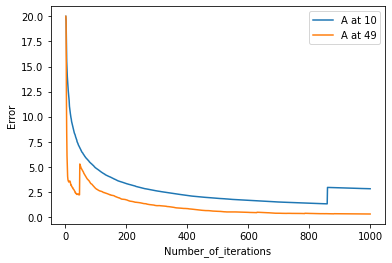

In [ ]:
plt.plot(i_A4[:1000] , e_A4[:1000] , linestyle = '-', label = 'A at 10')
plt.plot(ii_A4[:1000] , ei_A4[:1000] , linestyle = '-', label = 'A at 49')
plt.xlabel('Number_of_iterations')
plt.ylabel('Error')
plt.legend()